n format.
ights.

# Exploratory Data Analysis on the Adult Dataset

This notebook performs exploratory data analysis (EDA) on the Adult dataset, which is available from the UCI Machine Learning Repository.

## Dataset Details
- **Source**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/adult)
- **Description**: This dataset contains census data and is often used for tasks such as predicting whether a person's income exceeds $50K/year based on various attributes.

## Steps in This Notebook
1. Data Loading and Inspection
2. Data Cleaning and Preprocessing
3. Exploratory Data Analysis (EDA)
4. Ethical Analysis and Considerations
## Please indicate in your submission whether you want your name associated with the notebook: YES

In [63]:

# Load and Inspect Dataset
def load_data(file_path):
    """Loading the dataset, along with try-except block to handle common issues like missing or malformed files."""
    try:
        data = pd.read_csv(file_path, header=None, na_values=" ?", skipinitialspace=True)
        print(f"Dataset loaded successfully with shape: {data.shape}")
        return data
    except FileNotFoundError:
        print("Error: File not found. Please ensure the dataset is in the correct location.")
        return None
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# File path to the dataset
file_path = "adult.data"
data = load_data(file_path)

# Display first few rows if data is loaded
if data is not None:
    data.head()


Dataset loaded successfully with shape: (32561, 15)


In [65]:
def rename_columns(data):
    """Renaming the columns to meaningful names."""
    column_names = [
        'age', 'workclass', 'fnlwgt', 'education', 'education_num',
        'marital_status', 'occupation', 'relationship', 'race', 'sex',
        'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
    ]
    data.columns = column_names
    print("Columns renamed successfully.")
    return data

if data is not None:
    data = rename_columns(data)
    data.head()


Columns renamed successfully.


In [67]:
def clean_data(data, impute_missing=False):
    """Cleaning the dataset by handling missing values and duplicates."""
    print(f"Initial data shape: {data.shape}")
    # Handle missing values
    if impute_missing:
        data.fillna(data.mode().iloc[0], inplace=True)  # Impute with mode
        print("Missing values imputed with mode.")
    else:
        data.dropna(inplace=True)
        print("Rows with missing values dropped.")
    
    # Drop duplicates
    data.drop_duplicates(inplace=True)
    print(f"Cleaned data shape: {data.shape}")
    return data

if data is not None:
    data = clean_data(data, impute_missing=False)


Initial data shape: (32561, 15)
Rows with missing values dropped.
Cleaned data shape: (32537, 15)


In [69]:
def generate_summary_statistics(data):
    """Generating and displaying the summary statistics."""
    print("\n--- Descriptive Statistics ---\n")
    print(data.describe(include='all'))
    print("\n--- Null Value Counts ---\n")
    print(data.isnull().sum())

if data is not None:
    generate_summary_statistics(data)



--- Descriptive Statistics ---

                 age workclass        fnlwgt education  education_num  \
count   32537.000000     32537  3.253700e+04     32537   32537.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22673           NaN     10494            NaN   
mean       38.585549       NaN  1.897808e+05       NaN      10.081815   
std        13.637984       NaN  1.055565e+05       NaN       2.571633   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.369930e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

            marital_status      occupation relationship   race    sex  \
count            

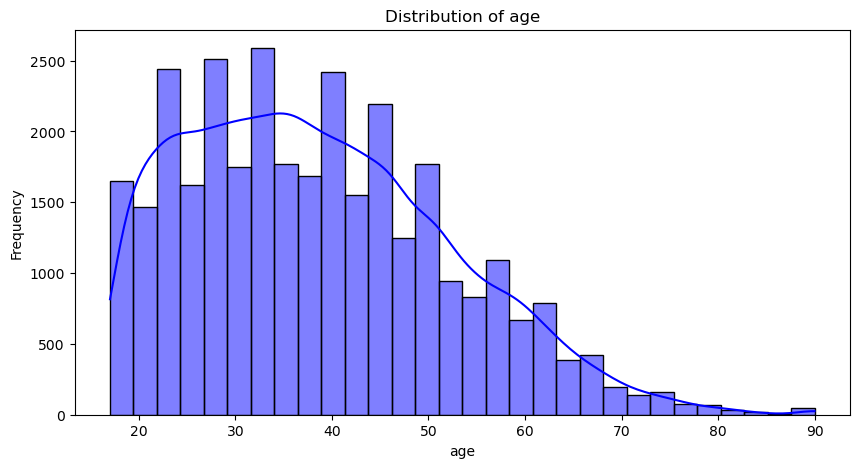

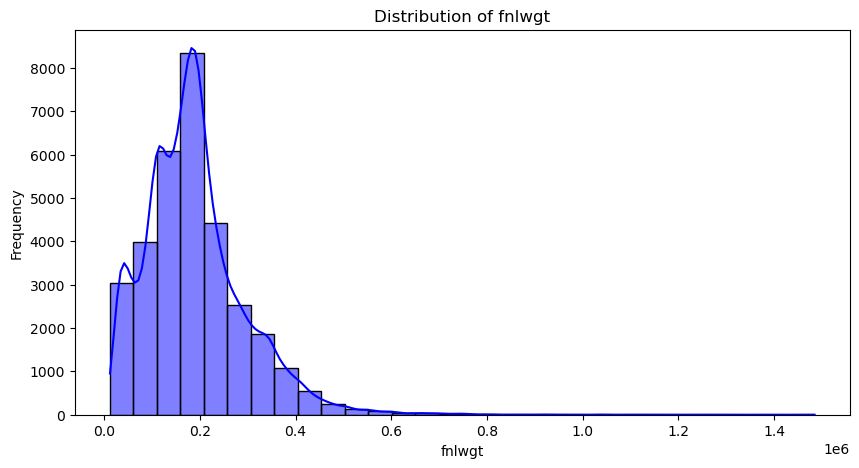

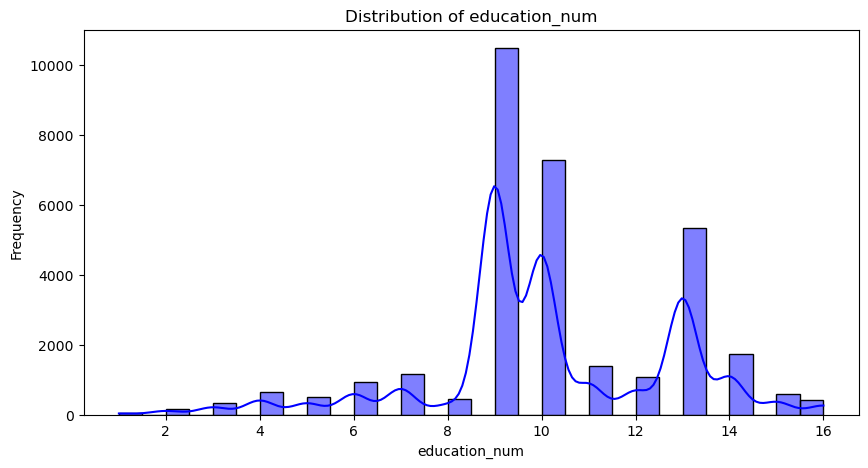

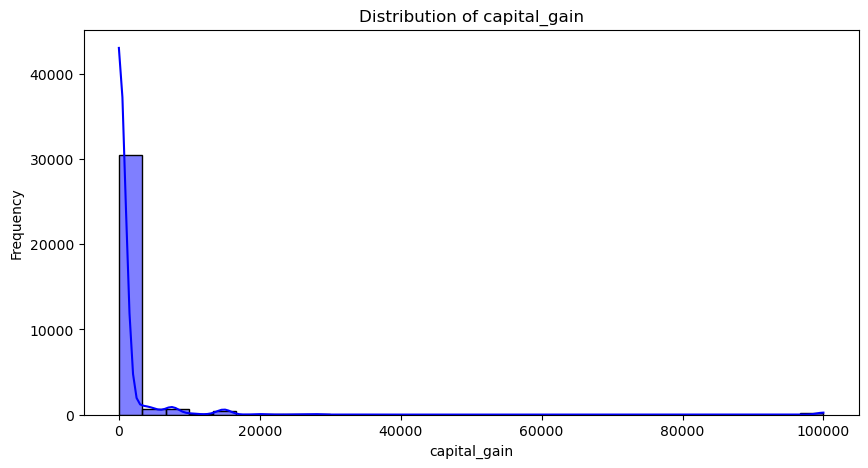

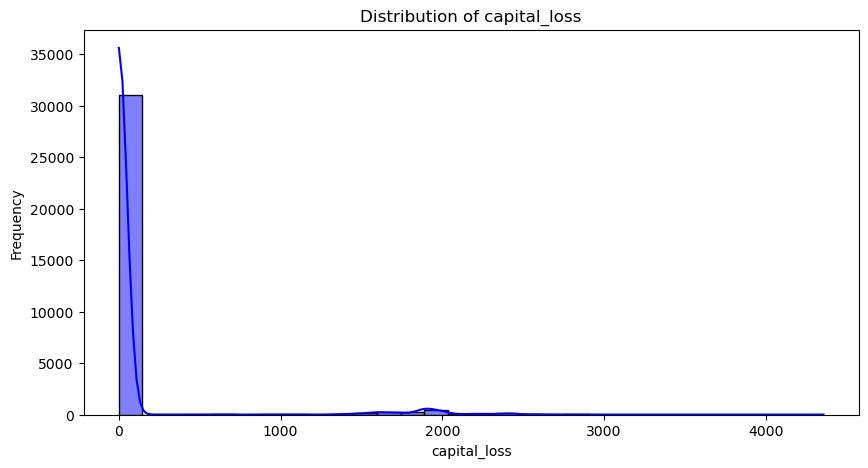

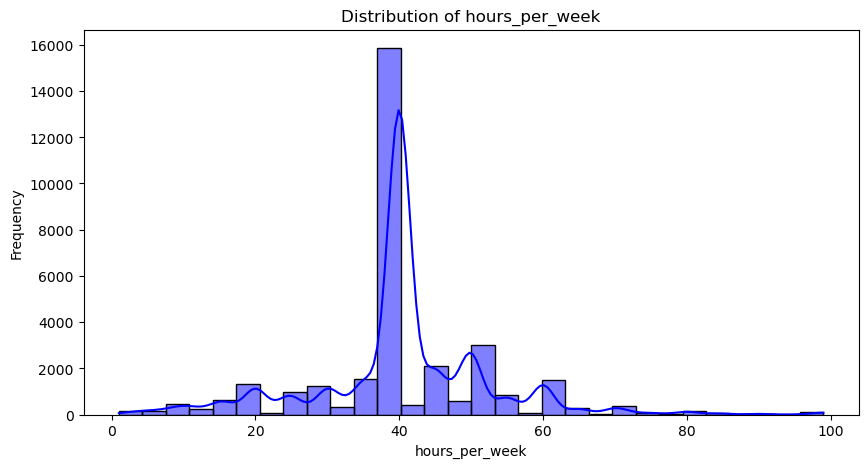

In [71]:
def plot_numeric_distributions(data):
    """Ploting the distributions for numeric columns."""
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        plt.figure(figsize=(10, 5))
        sns.histplot(data[col], kde=True, color='blue', bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

if data is not None:
    plot_numeric_distributions(data)


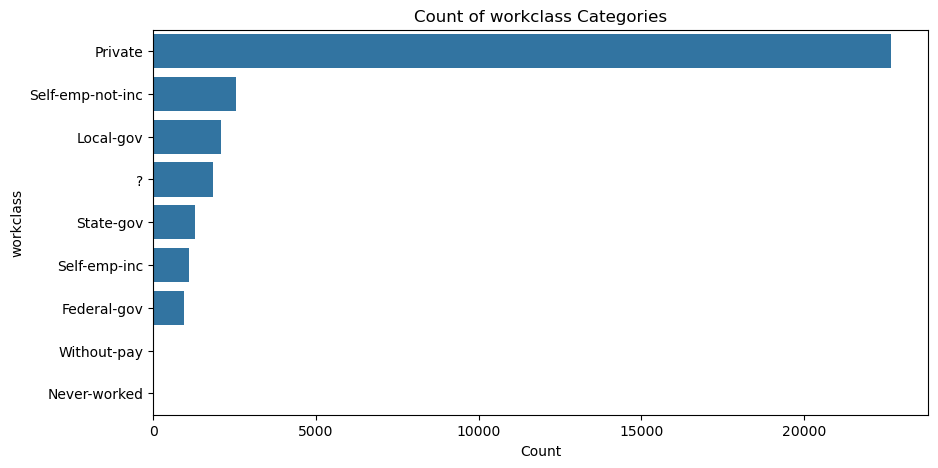

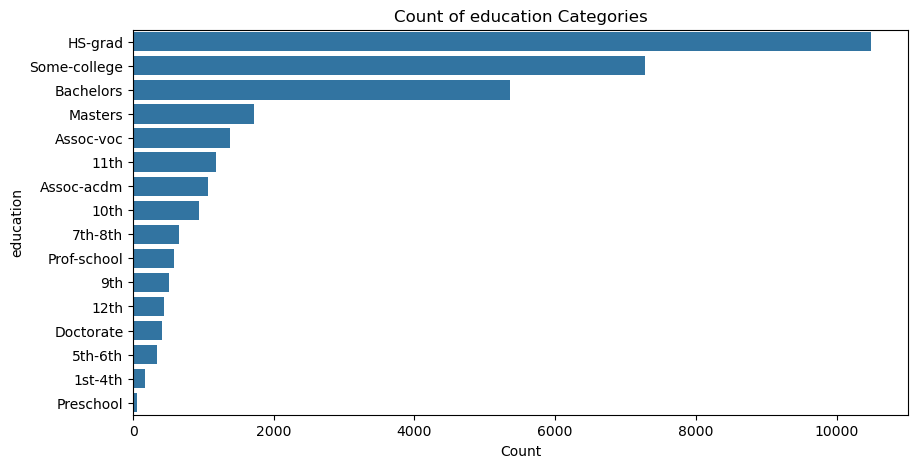

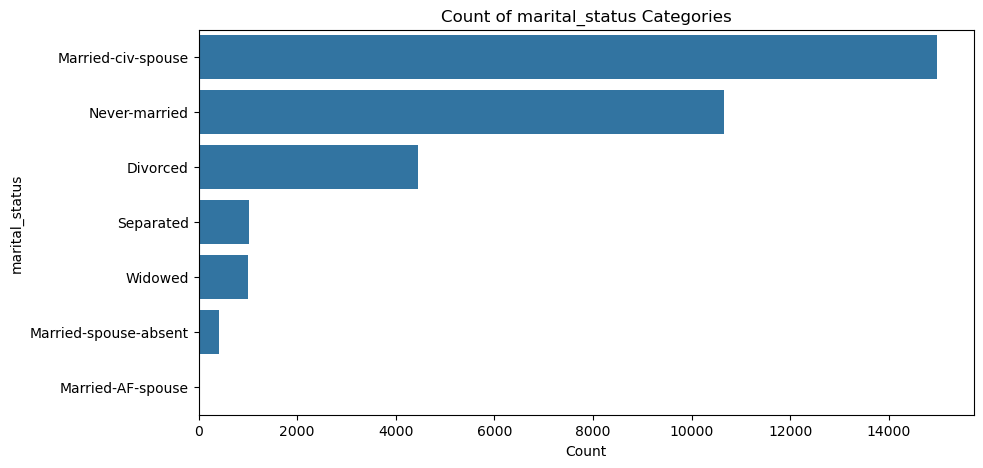

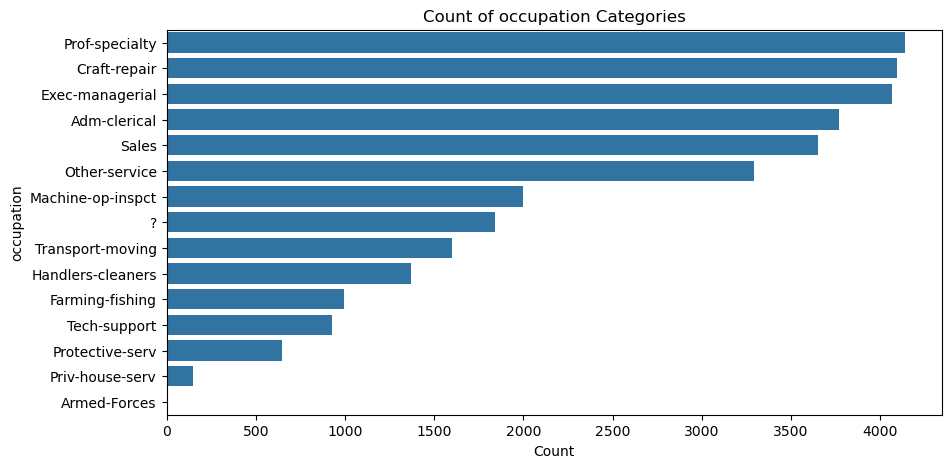

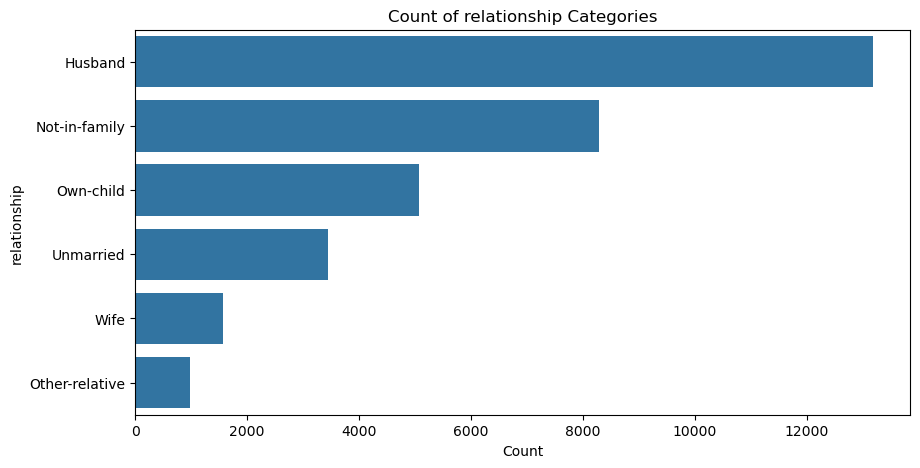

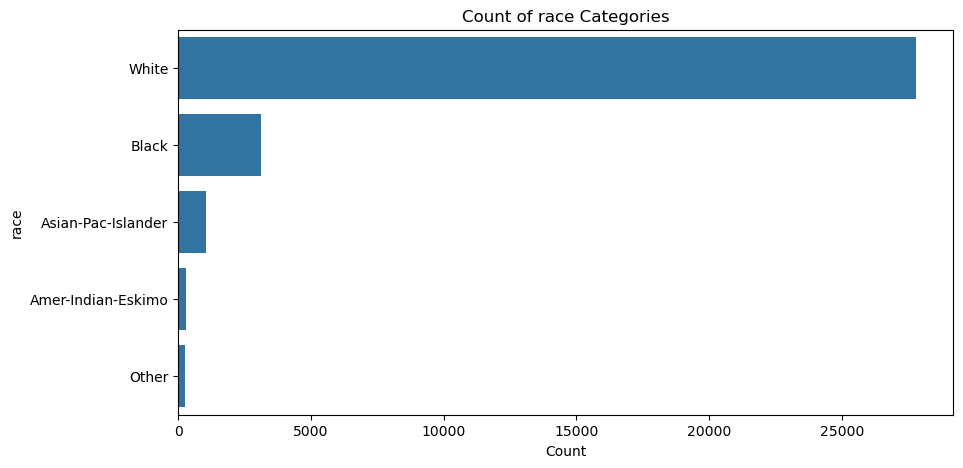

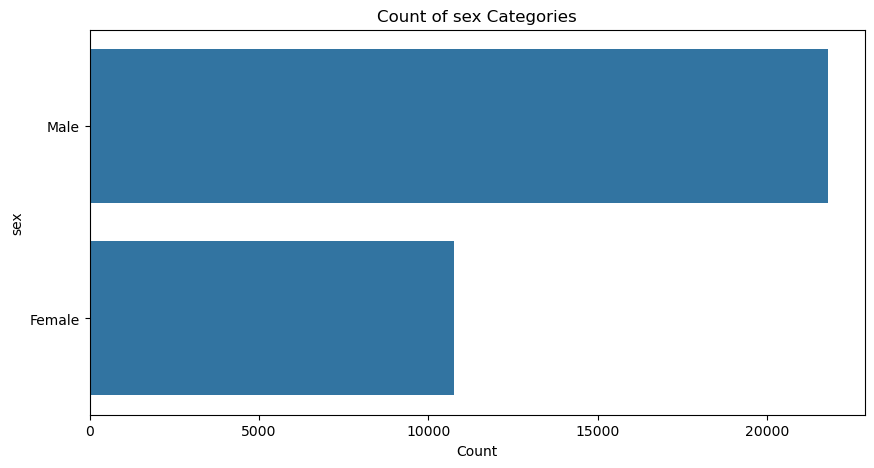

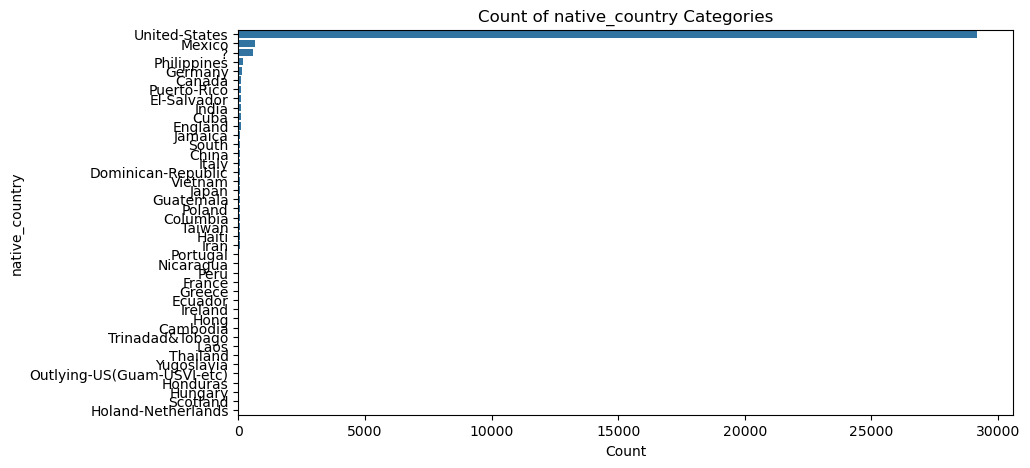

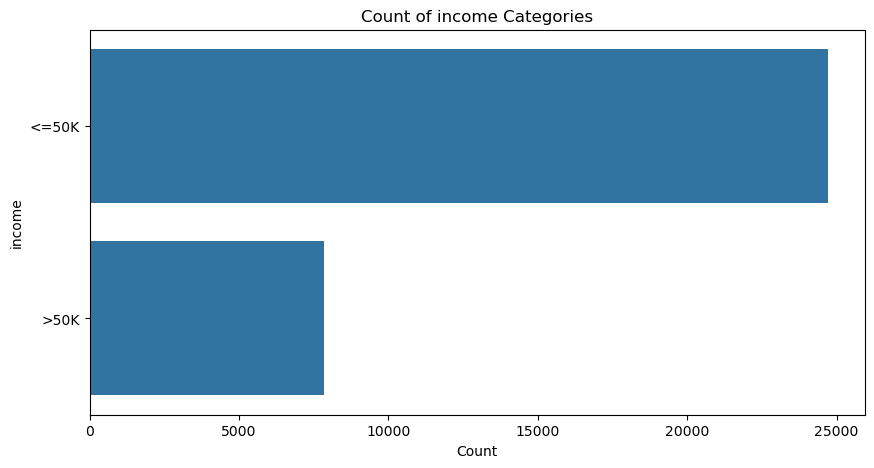

In [72]:
def plot_categorical_counts(data):
    """Ploting the counts for categorical columns."""
    cat_cols = data.select_dtypes(include=['object']).columns
    for col in cat_cols:
        plt.figure(figsize=(10, 5))
        sns.countplot(
            y=col,
            data=data,
            order=data[col].value_counts().index
        )
        plt.title(f'Count of {col} Categories')
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.show()

if data is not None:
    plot_categorical_counts(data)


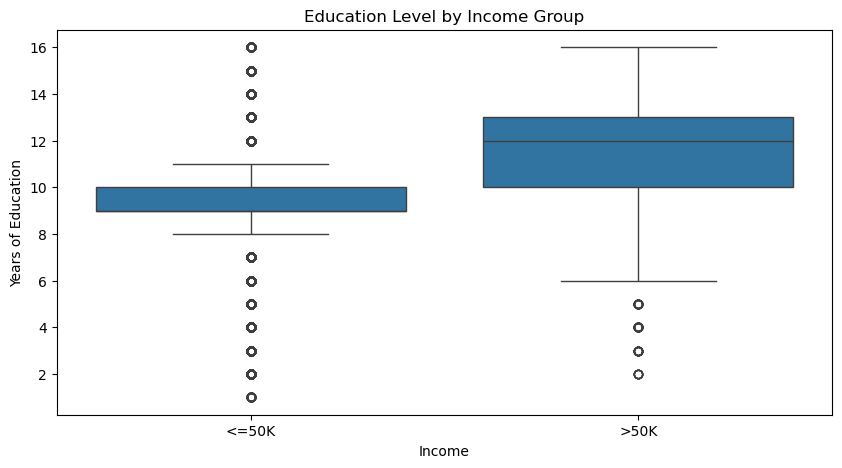

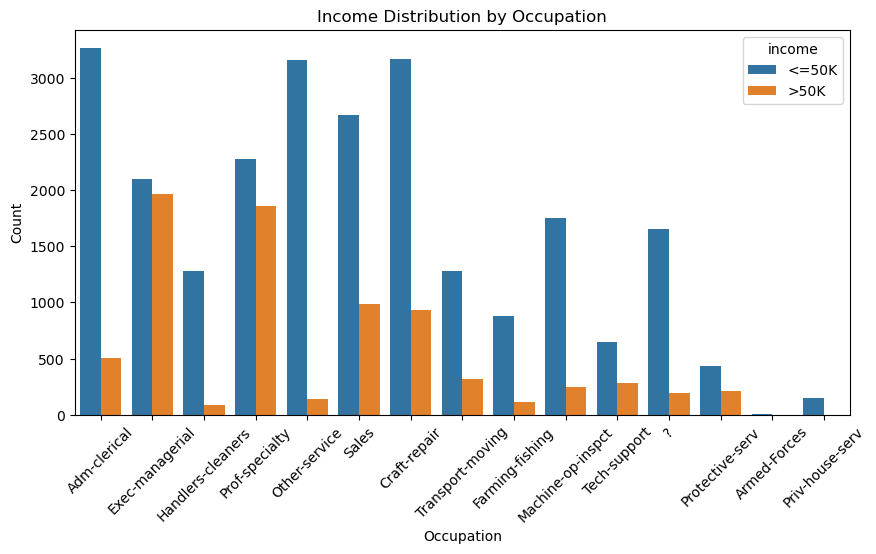

In [73]:
def analyze_relationships(data):
    """Analyzing  therelationships between features."""
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='income', y='education_num', data=data)
    plt.title('Education Level by Income Group')
    plt.xlabel('Income')
    plt.ylabel('Years of Education')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.countplot(x='occupation', hue='income', data=data)
    plt.title('Income Distribution by Occupation')
    plt.xlabel('Occupation')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

if data is not None:
    analyze_relationships(data)
